# Plot sea water temperature at Buoy "Bahia de Palma"

In [18]:
%matplotlib inline
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib import dates
import datetime, time, calendar
import matplotlib as mpl
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

'en_US.utf8'

In [7]:
BoyaPalma201406 = 'http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-06.nc'
BoyaPalma201407 = 'http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-07.nc'
BoyaPalma201506 = 'http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-06.nc'
BoyaPalma201507 = 'http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-07.nc'

#Load data

In [9]:
# 2014
with netcdf.Dataset(BoyaPalma201406,'r', format='NETCDF4') as nc:
        temperature2014 = nc.variables['WTR_TEM_SBE37'][:]
        ttime = nc.variables['time'][:]
with netcdf.Dataset(BoyaPalma201407,'r', format='NETCDF4') as nc:
        temperature2014 = np.append(temperature2014, nc.variables['WTR_TEM_SBE37'][:])
        ttime2014 = np.append(ttime, nc.variables['time'][:])
# 2015
with netcdf.Dataset(BoyaPalma201506,'r', format='NETCDF4') as nc:
        temperature2015 = nc.variables['WTR_TEM_SBE37'][:]
        ttime = nc.variables['time'][:]
with netcdf.Dataset(BoyaPalma201507,'r', format='NETCDF4') as nc:
        temperature2015 = np.append(temperature2015, nc.variables['WTR_TEM_SBE37'][:])
        ttime2015 = np.append(ttime, nc.variables['time'][:])

## Filter bad values

In [10]:
temperature2014 = np.ma.masked_greater(temperature2014, 28.)
temperature2015 = np.ma.masked_greater(temperature2015, 28.)

## Prepare time vectors for the plot

For 2015 time array, we remove one year in order to superpose the two curves.

In [11]:
dts = map(datetime.datetime.fromtimestamp, ttime2014) 
fds2014 = dates.date2num(dts) # converted

dts = map(datetime.datetime.fromtimestamp, ttime2015-86400.*365.) 
fds2015 = dates.date2num(dts) # converted

# Make the plot

## Format the time 

In [12]:
hfmt = dates.DateFormatter('%B')

In [19]:
mpl.rcParams.update({'font.size': 20})
mpl.rcParams['lines.color'] = 'k'

## Create the figure

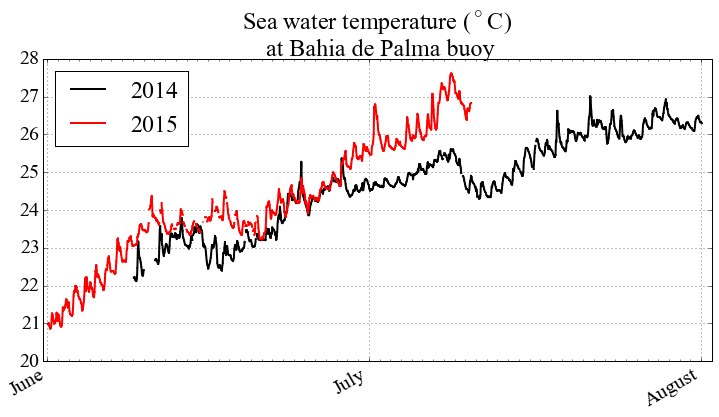

In [20]:
fig=plt.figure(num=None, figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(fds2014, temperature2014, 'ko-', ms=1, label='2014')
plt.plot(fds2015, temperature2015, 'ro-', ms=1, markeredgecolor='r', label='2015')

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(hfmt)
ax.set_xlim(fds2015.min()-0.5,fds2014.max()+1)
ax.set_ylim(20.,28.)
ax.legend(loc=2)
plt.title('Sea water temperature ($^{\circ}$C)\n at Bahia de Palma buoy')
fig.autofmt_xdate()
plt.grid()